# Chapter 3 Homework

## James O. Thomas

## Computational Physics

## Exercise 3.1: Plotting experimental data

In the on-line resources you will find a file called sunspots.txt, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot number.

a) Write a program that reads in the data and makes a graph of the sunspots as a function of time.

b) Modify your program to display only the first 1000 data points on the graph.

c) Modify your program further to calculate and plot the running average of the data, defined by

$$ Y_k = \frac{1}{2r} \sum ^r_{m=-r} y_{k+m} $$

where $r=5$ in this case (and $y_k$ are the sunspot numbers). Have the program plot both the original data and the running average on the same graph, again over the range covered by the first 1000 data points.

In [3]:
%matplotlib inline

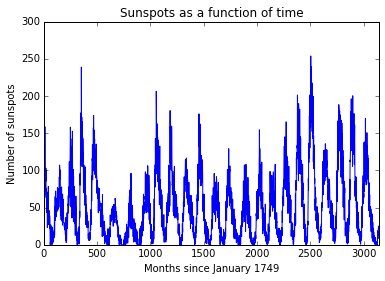

In [6]:
# Solution to 3.1 a)
'''
Program to read in data from a txt file and then plot it

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

month, sunspots = np.loadtxt("sunspots.txt", unpack = True)

plt.figure()
plt.title("Sunspots as a function of time")
plt.xlabel("Months since January 1749")
plt.xlim(0, 3142)
plt.ylabel("Number of sunspots")
plt.plot(month,sunspots)
plt.show()

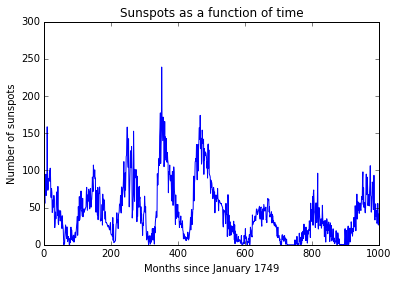

In [7]:
# Solution to 3.1 b)

'''
Program to only display the first 1000 data points.
All that I changed from part a) was the plt.xlim line.

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

month, sunspots = np.loadtxt("sunspots.txt", unpack = True)

plt.figure()
plt.title("Sunspots as a function of time")
plt.xlabel("Months since January 1749")
plt.xlim(0, 1000)
plt.ylabel("Number of sunspots")
plt.plot(month,sunspots)
plt.show()

There are also ways to only read the fist N lines of a file, but they involve opening the file and reading it line by line inside of a loop (as opposed to only plotting N data points). This seems very C like to me and misses the advantages of using python.

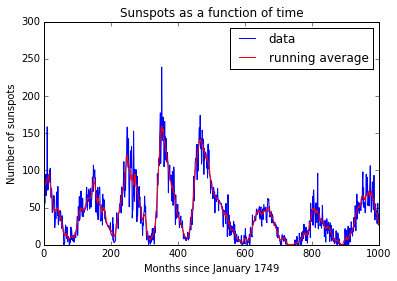

In [4]:
# Solution to 3.1 c)
'''
Modification of program to calculate and plot the running average of the sunspot numbers.

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

month, sunspots = np.loadtxt("sunspots.txt", unpack = True)

avg = np.zeros(len(sunspots))
for i in np.arange(5,len(avg)-5,1):
    total = 0
    for j in np.arange(-5,6,1):         # to match the np.average(y[i-5:i+6]) in the email (average over 11 points)
        total = total + sunspots[i+j]
    avg[i] = total/11
    

plt.figure()
plt.title("Sunspots as a function of time")
plt.xlabel("Months since January 1749")
plt.xlim(0, 1000)
plt.ylabel("Number of sunspots")
plt.plot(month,sunspots, label = 'data')
plt.plot(month[avg>0],avg[avg>0],'r', label = 'running average')
plt.legend()
plt.show()

## Exercise 3.3:

There is a file in the on-line resources called stm.txt, which contains a grid of values from scanning tunneling microscope measurements of the (111) surface of silicon. A scanning tunnelling microscope (STM) is a device that measures the shape of a surface at the atomic level by tracking a sharp tip over the surface and measuring quantum tunneling current as a function of position. The end result is a grid of values that represent the height of the surface and the file stm.txt contains just such a grid of values. Write a program that reads the data contained in the file and makes a density plot of the values. Use the various options and variants you have learned about to make a picture that shows the structure of the silicon surface clearly.

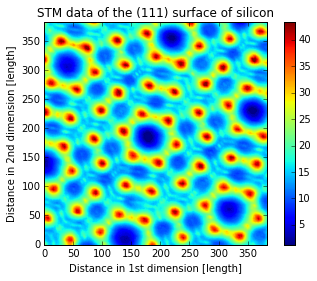

In [18]:
# Solutin to 3.3
'''
Program to display STM data collected from the surface of silicon

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

stm_data = np.loadtxt("stm.txt")

plt.figure()
plt.title('STM data of the (111) surface of silicon')
plt.xlabel('Distance in 1st dimension [length]')  # Are these nanometers?
plt.ylabel('Distance in 2nd dimension [length]')  # Are these nanometers?
plt.imshow(stm_data, origin='lower')              # Should the origin be lower left? or default?
plt.colorbar()                        # can only be shown AFTER imshow plots the data
                                      # what units? can you show units in the 3rd dimensions?
plt.show()

## Exercise 3.6: Deterministic chaos and the Feigenbaum plot:

One of the most famous examples of the phenomenon of chaos is the logistic map, defined by the equation

$$x' = rx(1-x).$$

For a given value of the constant $r$ you take a value of $x$-say $x=1/2$-and you feed it into the right-hand side of this equation, which gives you a value of $x'$. Then you take that value and feed it back in on the right-hand side again, which gives you another value, and so forth. this is a iterative map. You keep doing the same operation over and over on your value of $x$, and one of three things happens:

1. The value settles down to a fixed number and stays there. This is called *fixed point*. For instance, $x=0$ is always a fixed point of the logistic map. (You put $x=0$ on the right-hand side and you get $x'=0$ on the left.)

2. It doesn't settle down to a single value, but it settles down into a periodic pattern, rotating around a set of values, such as say four values, repeating them in sequence over and over. This is called a *limit cycle*.

3. It goes crazy. It generates a seemingly random sequence of numbers that appear to have no rhyme or reason to them at all. this is *deterministic chaos*. "Chaos" because it really does look chaotic, and "deterministic" because even though the values look random, they're not. They[re clearly entirely predictable, because they are given to you by one simple equation. The behavior is *determined*, although it may not look like it.

Write a program that calculates and displays the behavior of the logistic map. Here's what you need to do. For a given value of $r$, start with $x = 1/2$, and iterate the logistic map equation a thousand times. that will give it a chance to settle down to a fixed point or limit cycle if it's going to. then rn for another thousand iterations and plot the points $(r,x)$ on a graph where the horizontal axix is $r$ and the vertical axis is $x$. You can either use the plot fnction with the options "ko" or "k." to draw a graph with dots, one for each point, or you can use the scatter function to draw a scatter plot (which always uses dots). Repeat the whole calculation for values of $r$ from 1 to 4 in steps of 0.01, plotting the dots for all values of $r$ on the same figure and then finally using the function show once to display the complete figure.

Your program should generate a distinctive plot that looks like a tree bent over onto its side. this famous picture is called the *Feigenbaum plot*, after its discoverer Mitchell Feigenbaum, or sometime the *figtree plot*, a play on the fact that it looks like a tree and Feigenbaum means "figtree" in German.

Give answers to the following questions:

a) For a given value of $r$ what would a fixed point look like on the Feigenbaum plot? How about a limit cycle? And what would chaos look like?

b) Based on your plot, at what value of $r$ does the system move from orderly behavior (gixed points or limit cycles) to chaotic behavior? This point is sometimes called the "edge of chaos."

The logistic map is a very simple mathematical system, but deterministic chaos is seen in many more complex physical systems also, including expecially fluid dynamics and the weather. Because of its apparently random nature, the behavior of chaotic systems is difficult to predict and strongly affected by small pertubation in outside conditions. You've probably heard of the classic example of chaos in weather systems, the *butterfly effect*, which was popularized by physicist Edward Lorenz in 1972 when he gave a lecture to the American Assiciation for the Advancement of Science entitled, "Does the flap of a butterfly's wings in Brazil set off a tornado in Texas?"

/home/james/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:13: RuntimeWarning: overflow encountered in multiply


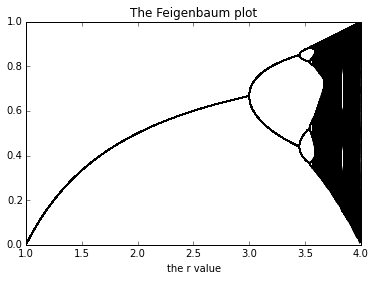

In [8]:
# Solution to Exercise 3.6
'''
Program to plot the Feigenbaum plot

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

def logistic_map(r,x):
    x = r*x*(1-x)
    return x

r = np.arange(1,4+0.01,0.01) # the r values to use
x = np.empty(len(rs))        # empty array for x values
x.fill(0.5)                  # fill the x with the initial value
                    
steps = 1000                  # the number of times to run the logistic map

plt.figure()

for i in range(steps):
    x = logistic_map(r,x)        # let it settle down
for i in range(steps):
    x = logistic_map(r,x)        # plot the behavior
    plt.plot(r,x,"k")

plt.title('The Feigenbaum plot')
plt.xlabel('the r value')
plt.show()

The code above generated the Feigenbaum plot. When I initially wrote this code as described in the book, my python kernal would crash. As a result, I rewrote the code having python do the calculation on the whole array of r values rather than individual values. The second method is significantly quicker (by a factor of something like 1/1000). However, I still get a runtime warning: overflow encountered in multiply indicating that I am reaching the limit of what my system can handle.

For the questions asked in the problem statement:

a) For a given value of $r$  

* a fixed point is a single value x. This can be seen on the plot over the domain of around $1 \le r \le 3$ or so.

* a limit cycle is where a few values of x are returned for a given value of r. This can be seen on the plot over the domain of around $3 \le r \le 3.5$ or so.

* chaos is where many different values of x are returned. This can be seen on the plot over the domain of around $3.5 \le r$ or so.

b) Based on my plot, the system moves from orderly behavior to chaotic behavior at $ r \approx 3.5$

## Exercise 3.7 The Mandelbrot set:

The Mandelbrot set, named after its discoverer, the Frence mathematician Benoit Mandelbrot, is a *fractal*, an infinitely ramified mathematical object that contains structure within structure within structure, as deep as we care to look. The definition of the Mandelbrot set is in terms of complex numbers as follows. 

Consider the equation

$$z' = z^2 +c,$$

where $z$ is a complex number and $c$ is a complex constant. For any given balue of $c$ this equation turns an input number $z$ into an output number $z'$ the definition of the Mandelbrot set involves the repeated iteration of this equation: we take an initial starting value of $z$ and feed it into the equation to get a new value $z'$. Then we take that value and feed it in again to get another value, and so forth. The Mandelbrot set is the set of points in the complex plane that satisfies the following defintion:

*For a given complex value of $c$, start with $z=0$ and iterate repeatedly. If the magnitude of $|z|$ of the resulting value is ever greater tha 2, then the point in the complex plane at position $c$ is* not *in the Mandelbrot set, otherwise it is in the set.*

In order to use this definition on would, in principle, have to iterate infinitely many times to prove that a point is in the Mandelbrot set, since a point is in the set only if the iteration never passes $|Z|=2$ ever. In practice, however, one usually just performs some large number of iterations, say 100, and if $|Z|$ hasn't exceeded 2 by that point then we call that good enough.

Write a program to make an image of the Mandelbrot set by performing the iteration for all value of $c = x + iy$ on an $N \times N$ grid spanning the regions where $ -2 \le x \le 2 $ and $-2 \le y \le 2 $. Make a density plot in which grid points inside the Mandelbrot set are colored black and those outside are colored white. The Mandelbrot set has a very distinctive shapte that looks something like a beetle with a long snout-you'll know it when you see it.

Hint: You will probably find it useful to start off with quite a coarse grid, i.e, with a small value of $N$ - perhaps $N=100$ - so that your program runs quickly while you are testing it. Once you are sure it is working correctly, increast eh value of $N$ to produce a final high - quality image of the shape of the set.

If you are feeling enthusiastic, here is another variant of the smae exercise that can produce amazing looking pictures. Instead of coloring points just black or white, color points according to the number of iterations of the equation before $|z|$ becomes greater than 2 (or the maximum number of iterations if $|z|$ never becomes greater than 2). If you use one of the more colorful color schemes Python provides for density plots, such as the "hot" or "jet" schemes, you can make some spectacular images this way. Another interesting variant is to color accorgint to the logarithm of the number of iterations, which helps reveal some of the finer structure outside the set.

working:  0.0 %
working:  10.0 %
working:  20.0 %
working:  30.0 %
working:  40.0 %
working:  50.0 %
working:  60.0 %
working:  70.0 %
working:  80.0 %
working:  90.0 %


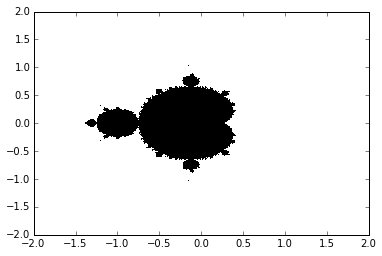

In [2]:
# Solution to 3.7
'''
Program to plot the Mandelbrot set

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt
    
def Mandelbrot(c):
    z = 0 + 0j
    for i in range(100):
        z = z**2 + c
        if abs(z) > 2:
            break
    if abs(z) >= 2:
        return False           # this c value does not lie in the madelbrot set
    else:
        return True           # this c value does lie in the mandelbrot set

steps = 500
counter = 0 # just for the print('working...') statement
plt.figure()

for c_real in np.linspace(-2,2,steps):
    if counter % 50 == 0:
        print('working: ', float(counter)/float(steps)*100,'%')
    for c_imag in np.linspace(-2,2,steps):
        c = complex(c_real,c_imag)
        out = Mandelbrot(c)
        if out == True:
            plt.plot(c_real,c_imag,"k,")
        else:
            plt.plot(c_real,c_imag,"w,")
    counter = counter + 1 
    
plt.show()

# print(Mandelbrot(0+0j))

After some amount of time, the code generates the Mandelbrot set.

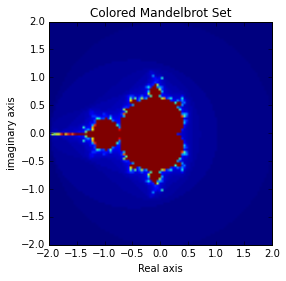

In [15]:
# now calculate the mandelbrot set for the color according to the number of iterations before z becomes >2


# Solution to 3.7
'''
Program to plot the Mandelbrot set

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt
    
def Mandelbrot(c, n=100):
    z = 0 + 0j
    for i in range(n):
        z = z**2 + c
        if abs(z) > 2:
            n = i        # return the number of steps taken to get out of the Mandelbrot set
            break
    return n                # if in the Mandelbrot set, return 100

n_steps = 100
step_size = 4./n_steps

# first initialize the array for storing the values
mand = np.empty((n_steps,n_steps))
real_axis = np.arange(-2,2+step_size,step_size)
imag_axis = np.arange(-2,2+step_size,step_size)

for r in range(steps):
    c_real = real_axis[r]
    for i in range(steps):
        c_imag = imag_axis[i]
        c = complex(c_real,c_imag)
        out = Mandelbrot(c)
        mand[i,r] = out

        
plt.figure()
plt.title('Colored Mandelbrot Set')
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.imshow(mand, extent = [-2,2,-2,2])
plt.show()

The above code generates a Mandlebrot set where the color corresponds to the number of iterations taken for $|z| > 2$.

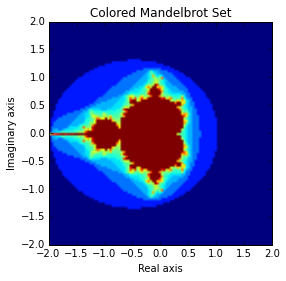

In [17]:
# now calculate the mandelbrot set for the color according to the number of iterations before z becomes > 2
# and color according to log_{base 10} (iteration number)

# Solution to 3.7
'''
Program to plot the Mandelbrot set

James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

def Mandelbrot(c, n=100):
    z = 0 + 0j
    for i in range(n):
        z = z**2 + c
        if abs(z) > 2:
            n = i        # return the number of steps taken to get out of the Mandelbrot set
            break
    return n                # if in the Mandelbrot set, return 100

n_steps = 100
step_size = 4./n_steps

# first initialize the array for storing the values
mand = np.empty((n_steps,n_steps))
real_axis = np.arange(-2,2+step_size,step_size)
imag_axis = np.arange(-2,2+step_size,step_size)

for r in range(steps):
    c_real = real_axis[r]
    for i in range(steps):
        c_imag = imag_axis[i]
        c = complex(c_real,c_imag)
        out = Mandelbrot(c)
        if out > 0:                # special care since log(0) is undefined
            out = np.log10(out)
        mand[i,r] = out

        
plt.figure()
plt.title('Colored Mandelbrot Set')
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.imshow(mand, extent = [-2,2,-2,2])
plt.show()

This shows the mandelbrot set where the coloring corresponds to the log of the number of iterations before $|z| > 2$